# Kernel PCA


In [61]:
from sklearn.datasets import make_circles

In [62]:
from sklearn.decomposition import PCA, KernelPCA

In [63]:
import numpy as np
import pandas as pd

In [64]:
X, y = make_circles(n_samples=400, factor= 0.3, noise=0.05)

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

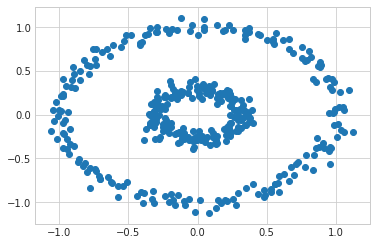

In [66]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1]);

In [67]:
kpca = KernelPCA(kernel='rbf', fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)

In [68]:
pca = PCA()
X_pca = pca.fit_transform(X)

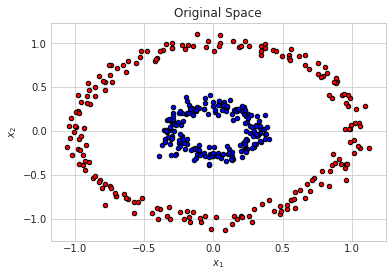

In [69]:
plt.figure()
plt.title("Original Space")
red = y == 0
blue = y == 1
plt.scatter(X[red, 0], X[red, 1], c="red", s=20, edgecolors="k")
plt.scatter(X[blue, 0], X[blue, 1], c="blue", s=20, edgecolors="k")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$");

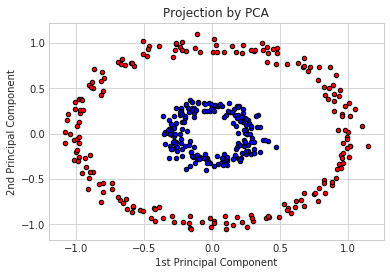

In [70]:
plt.scatter(X_pca[red, 0], X_pca[red, 1], c="red", s=20, edgecolors="k")
plt.scatter(X_pca[blue, 0], X_pca[blue, 1], c="blue", s=20, edgecolors="k")
plt.title("Projection by PCA")
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component");

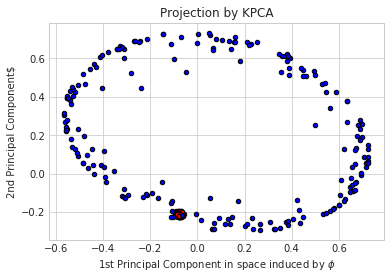

In [72]:
plt.scatter(X_kpca[red, 0], X_kpca[red, 1], c="red", s=20, edgecolors="k")
plt.scatter(X_kpca[blue, 0], X_kpca[blue, 1], c="blue", s=20, edgecolors="k")
plt.title("Projection by KPCA")
plt.xlabel("1st Principal Component in space induced by $\phi$")
plt.ylabel("2nd Principal Component$");

## Kernel PCA Example

In [75]:
df = sns.load_dataset('iris')
df = df[df['species']!= 'setosa']

In [76]:
col = ['petal_length', 'petal_width']
X = df.loc[:, col]
species_to_num = {'versicolor': 0,
                  'virginica': 1}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']

In [77]:
kpca = KernelPCA(kernel='rbf', n_components=2)
X_kpca = kpca.fit_transform(X)

In [78]:
from sklearn.linear_model import LogisticRegression

In [81]:
clf = LogisticRegression()
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [82]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

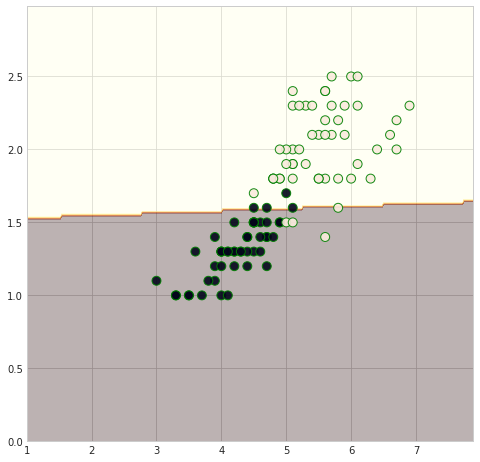

In [83]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(8,8))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3);
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80, 
            alpha=0.9, edgecolors='g');

In [84]:
clf.fit(X_kpca, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

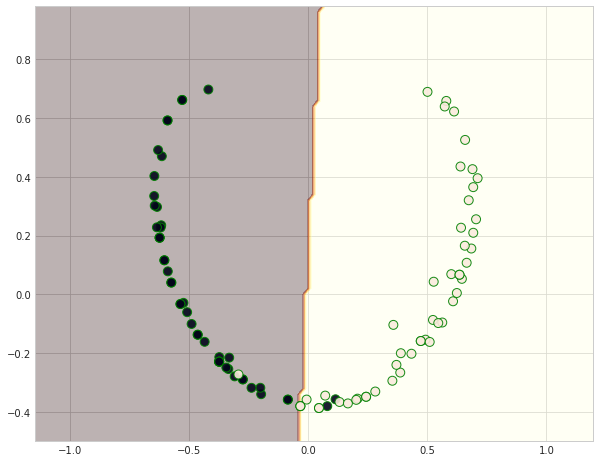

In [85]:
Xv = X_kpca
h = 0.02
x_min, x_max = Xv.min()- 0.5, Xv.max() + 0.5
y_min, y_max = y.min() - 0.5, y.max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(10,8))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3);
plt.scatter(X_kpca[:,0], X_kpca[:,1], c=y, s=80, 
            alpha=0.9, edgecolors='g');